In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train /= 255

x_train_flat = x_train.reshape(x_train.shape[0], 784, 1)

print(f"x_train shape : {x_train.shape}, sample : {x_train[0].T}")
print(f"x_train shape : {x_train_flat.shape}, sample : {x_train_flat[0].T}")

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32')
x_test /= 255

x_test_flat = x_test.reshape(x_test.shape[0], 784, 1)

x_train shape : (60000, 28, 28, 1), sample : [[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0

## Autoencoder with 1 Hidden Layer

In [16]:
# Input layer
input_img = tf.keras.layers.Input(shape=(784,))

# Hidden layer
encoded = tf.keras.layers.Dense(32, activation='relu')(input_img)

# Output layer
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
%%time

autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
188/188 [==============================] - 1s 5ms/step - loss: 0.2967 - val_loss: 0.1985
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1802 - val_loss: 0.1652
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1552 - val_loss: 0.1455
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.1390 - val_loss: 0.1325
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1278 - val_loss: 0.1231
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1196 - val_loss: 0.1162
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1134 - val_loss: 0.1109
Epoch 8/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1085 - val_loss: 0.1067
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1047 - val_loss: 0.1036
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1017 - val_loss: 0.1011

In [21]:
%%time

score = autoencoder.evaluate(x_test_flat, x_test_flat, verbose=0)
print('Test loss:', score)

Test loss: 0.09173693507909775
CPU times: total: 78.1 ms
Wall time: 387 ms


1/1 [==============================] - 0s 88ms/step


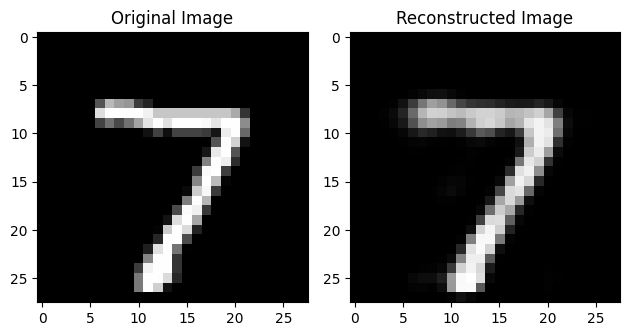

In [22]:
img = x_test_flat[0]

# Reconstruct the image using the autoencoder model
reconstructed_img = autoencoder.predict(np.array([img]))

# Reshape the reconstructed image into a 28x28 pixel format
reconstructed_img = reconstructed_img.reshape((28, 28))

fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes.flatten()

ax1.imshow(img.reshape(28, 28), cmap='gray')
ax1.set_title('Original Image')

ax2.imshow(reconstructed_img, cmap='gray')
ax2.set_title('Reconstructed Image')

plt.tight_layout()
plt.show()

## AlexNet

In [30]:
alexNet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

alexNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
alexNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 18, 18, 32)        3904      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)        

In [33]:
%%time

alexNet.fit(x_train, y_train, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 24s 123ms/step - loss: 1.7721 - accuracy: 0.3328 - val_loss: 0.8729 - val_accuracy: 0.6990
Epoch 2/10
188/188 [==============================] - 23s 120ms/step - loss: 0.5409 - accuracy: 0.8210 - val_loss: 0.3104 - val_accuracy: 0.8988
Epoch 3/10
188/188 [==============================] - 25s 131ms/step - loss: 0.2761 - accuracy: 0.9119 - val_loss: 0.2305 - val_accuracy: 0.9271
Epoch 4/10
188/188 [==============================] - 25s 134ms/step - loss: 0.1972 - accuracy: 0.9371 - val_loss: 0.1805 - val_accuracy: 0.9422
Epoch 5/10
188/188 [==============================] - 26s 137ms/step - loss: 0.1608 - accuracy: 0.9495 - val_loss: 0.1609 - val_accuracy: 0.9512
Epoch 6/10
188/188 [==============================] - 27s 145ms/step - loss: 0.1412 - accuracy: 0.9553 - val_loss: 0.1326 - val_accuracy: 0.9593
Epoch 7/10
188/188 [==============================] - 28s 147ms/step - loss: 0.1165 - accuracy: 0.9638 - val_loss: 0.1106 - val_ac

In [65]:
alexNet.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 776.6279 - accuracy: 0.3601


[776.6279296875, 0.36010000109672546]

1/1 [==============================] - 0s 14ms/step


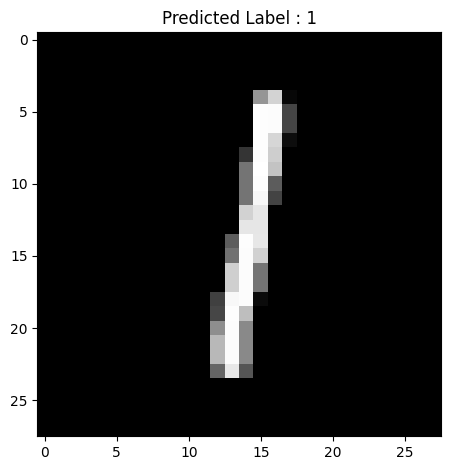

In [62]:
img = x_test[1280]

# classify image using the alexNet model
predicted_label = alexNet.predict(np.array([img]))
predicted_label = np.argmax(predicted_label)

fig, ax = plt.subplots()
ax.imshow(img.reshape(28, 28), cmap='gray')
ax.set_title(f'Predicted Label : {predicted_label}')

plt.tight_layout()
plt.show()

# LeNet-5

In [66]:
%%time

leNet = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D(strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.MaxPool2D(strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

leNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

CPU times: total: 0 ns
Wall time: 45 ms


In [67]:
leNet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 120)              

In [68]:
%%time

leNet.fit(x_train, y_train, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 6s 29ms/step - loss: 1.8275 - accuracy: 0.3497 - val_loss: 1.1407 - val_accuracy: 0.6249
Epoch 2/10
188/188 [==============================] - 5s 28ms/step - loss: 0.7774 - accuracy: 0.7564 - val_loss: 0.5421 - val_accuracy: 0.8349
Epoch 3/10
188/188 [==============================] - 5s 28ms/step - loss: 0.5158 - accuracy: 0.8415 - val_loss: 0.4391 - val_accuracy: 0.8650
Epoch 4/10
188/188 [==============================] - 5s 29ms/step - loss: 0.4259 - accuracy: 0.8709 - val_loss: 0.3551 - val_accuracy: 0.8917
Epoch 5/10
188/188 [==============================] - 5s 28ms/step - loss: 0.3570 - accuracy: 0.8918 - val_loss: 0.3076 - val_accuracy: 0.9064
Epoch 6/10
188/188 [==============================] - 5s 28ms/step - loss: 0.3056 - accuracy: 0.9074 - val_loss: 0.2600 - val_accuracy: 0.9208
Epoch 7/10
188/188 [==============================] - 5s 28ms/step - loss: 0.2645 - accuracy: 0.9199 - val_loss: 0.2362 - val_accuracy: 0.9285

In [69]:
leNet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 40.9487 - accuracy: 0.9008


[40.94874954223633, 0.9007999897003174]

1/1 [==============================] - 0s 15ms/step


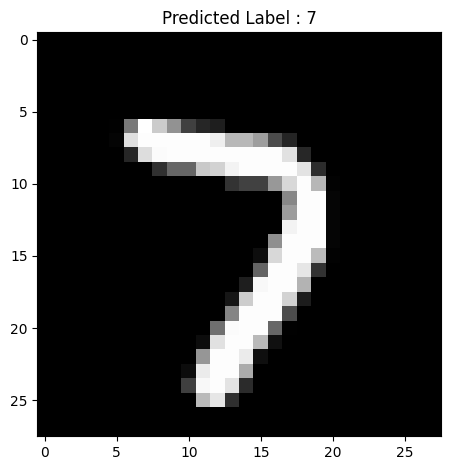

In [74]:
img = x_test[2874]

# classify image using the leNet model
predicted_label = leNet.predict(np.array([img]))
predicted_label = np.argmax(predicted_label)

fig, ax = plt.subplots()
ax.imshow(img.reshape(28, 28), cmap='gray')
ax.set_title(f'Predicted Label : {predicted_label}')

plt.tight_layout()
plt.show()

## VGG-16

In [84]:
vgg16 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same',
                               input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(strides=(2, 2), padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(strides=(2, 2), padding='same'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(strides=(2, 2), padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(strides=(2, 2), padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(strides=(2, 2), padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
%%time

vgg16.fit(x_train, y_train, epochs=10, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/10
120/188 [==================>...........] - ETA: 7:29 - loss: 2.3017 - accuracy: 0.1119

KeyboardInterrupt: 

In [ ]:
vgg16.evaluate(x_test, y_test)